In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import task1

ModuleNotFoundError: No module named 'task1.py'; 'task1' is not a package

In [10]:
def potential_energy_levels(L, V0, m, hbar, num_levels):
    def equation(E):
        return (1/np.tan(np.sqrt(2 * L**2 * V0 * (1 + E/V0)))) - np.sqrt((-V0/E) - 1) 

    energy_levels = []
    
    # initial guess
    for n in range(1, num_levels + 1):
        # bounds
        E_low = -n**2 * (hbar**2 * np.pi**2) / (2 * m * L**2)  # Lower bound by infinite well
        E_high = - 1e-5  # Upper bound just below the potential well, not correct for any precision
        print(E_high, E_low)
        
        # Bisection method
        while E_high - E_low > 1e-6:  #precision
            E_mid = (E_low + E_high) / 2
            if equation(E_low) * equation(E_mid) < 0:
                E_high = E_mid
            else:
                E_low = E_mid

        energy_levels.append((E_low + E_high) / 2)

    return energy_levels

def wave_function(x, L, n, E, m, hbar):
    k = np.sqrt(2 * m * E) / hbar
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

# Parameters
L = 1.0         # Width  (meters)
V0 = 1.0      # Height  (Joules)
m = 1   # (kg)
hbar = 1 #  (Js)
num_levels = 5  # Number of level

# Find energy levels
energy_levels = potential_energy_levels(L, V0, m, hbar, num_levels)

# Print results
for i, E in enumerate(energy_levels):
    print(f"Energy level step {i + 1}: {E:.4e} J")

-1e-05 -4.934802200544679
-1e-05 -19.739208802178716
-1e-05 -44.41321980490211
-1e-05 -78.95683520871486
-1e-05 -123.37005501361698
Energy level step 1: -6.0390e-01 J
Energy level step 2: -6.0390e-01 J
Energy level step 3: -6.0390e-01 J
Energy level step 4: -6.0390e-01 J
Energy level step 5: -6.0390e-01 J


C:\Users\belco\AppData\Local\Temp\ipykernel_10436\957682658.py:3: RuntimeWarning: invalid value encountered in sqrt
  return (1/np.tan(np.sqrt(2 * L**2 * V0 * (1 + E/V0)))) - np.sqrt((-V0/E) - 1)


In [11]:
"""насколько выходит на конст, и по х"""

'насколько выходит на конст, и по х'

In [6]:
# Plot potential well
plt.plot(x, np.zeros_like(x), 'k-', lw=2)  # Potential well line
plt.fill_between(x, -V0, color='lightblue', alpha=0.5)  # Fill the well area

# Plot wave functions and energy levels
for n in range(1, num_levels + 1):
    y_wave = wave_function(x, L, n, energy_levels[n-1], m, hbar) + energy_levels[n-1]
    plt.plot(x, y_wave, label=f'Wave Function n={n}')
    plt.axhline(energy_levels[n-1], color='orange', linestyle='--', lw=1)  # Energy level line

# Add labels and legends
plt.title('Wave Functions and Energy Levels in a One-Dimensional Rectangular Potential Well')
plt.xlabel('Position (m)')
plt.ylabel('Energy (J)')

plt.ylim(-5, max(energy_levels) + 5)
plt.axhline(0, color='black', lw=0.5)
plt.axhline(V0, color='red', linestyle='--', label='Potential Barrier')
plt.legend()
plt.grid()
plt.show()

NameError: name 'x' is not defined

In [ ]:
# method of 

C:\Users\belco\AppData\Local\Temp\ipykernel_2352\2199774195.py:9: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(k * L) - (k * hbar / np.sqrt(2 * m * V0 - 2 * m * E))
C:\Users\belco\AppData\Local\Temp\ipykernel_2352\2199774195.py:15: RuntimeWarning: invalid value encountered in sqrt
  return (L / np.cos(k * L)**2) * dk_dE - (hbar / np.sqrt(2 * m * V0 - 2 * m * E))
C:\Users\belco\AppData\Local\Temp\ipykernel_2352\2199774195.py:8: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt(2 * m * E) / hbar
C:\Users\belco\AppData\Local\Temp\ipykernel_2352\2199774195.py:13: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt(2 * m * E) / hbar
C:\Users\belco\AppData\Local\Temp\ipykernel_2352\2199774195.py:14: RuntimeWarning: invalid value encountered in sqrt
  dk_dE = hbar / (2 * np.sqrt(2 * m * E))


ValueError: max() arg is an empty sequence

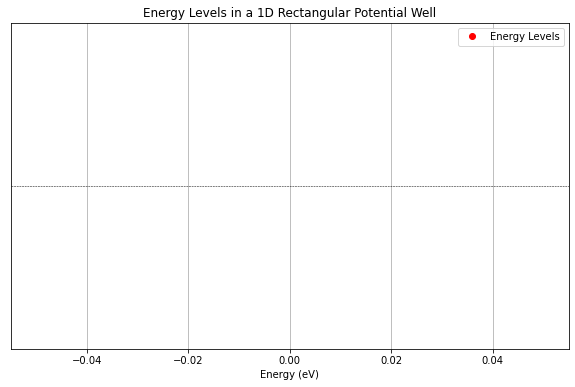

In [ ]:
m = 9.11e-31 
hbar = 1.055e-34  
V0 = 1.0e-18
L = 1e-10  

# function of equation
def f(E):
    k = np.sqrt(2 * m * E) / hbar
    return np.tan(k * L) - (k * hbar / np.sqrt(2 * m * V0 - 2 * m * E))

# derivative of the function
def df(E):
    k = np.sqrt(2 * m * E) / hbar
    dk_dE = hbar / (2 * np.sqrt(2 * m * E))
    return (L / np.cos(k * L)**2) * dk_dE - (hbar / np.sqrt(2 * m * V0 - 2 * m * E))

# Newton method
def newton(initial_guess, tol=1e-10, max_iter=100):
    E = initial_guess
    for _ in range(max_iter):
        f_E = f(E)
        f_prime_E = df(E)
        if abs(f_prime_E) < tol:  # Avoid division by zero
            break
        E_new = E - f_E / f_prime_E
        if abs(E_new - E) < tol:  # Convergence check
            return E_new    
        E = E_new
    return None  

# Finding energy levels
energy_levels = []
initial_guesses = np.linspace(1e-19, V0 - 1e-19, 20)  # Initial guess

for guess in initial_guesses:
    energy = newton(guess)
    if energy is not None and energy > 0 and energy not in energy_levels:
        # Check if tan(kL) > 0 
        k = np.sqrt(2 * m * energy) / hbar
        if np.tan(k * L) > 0:
            energy_levels.append(energy)

# Convert energy levels from Joules to electronvolts
energy_levels_eV = [E / 1.6e-19 for E in energy_levels]

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(energy_levels_eV, np.zeros_like(energy_levels_eV), 'ro', label='Energy Levels')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title('Energy Levels in a 1D Rectangular Potential Well')
plt.xlabel('Energy (eV)')
plt.yticks([])  
plt.legend()
plt.grid()
plt.xlim(0, max(energy_levels_eV) + 1)
plt.show()

print("Energy Levels (in eV):", energy_levels_eV)